In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import requests
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/earthquake1.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install folium

In [ ]:
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.1 MB/s eta 0:00:00


In [31]:
import folium
from folium.plugins import MarkerCluster
import pandas as pd

# Replace 'earthquake_data.csv' with the path to your CSV file
# Make sure your CSV file has 'Latitude' and 'Longitude' columns


# Create a map centered on a specific location (e.g., the world center)
m = folium.Map(location=[0, 0], zoom_start=2)

# Create a MarkerCluster to handle many earthquake points
marker_cluster = MarkerCluster().add_to(m)

# Add earthquake data to the map
for index, row in df.iterrows():
    folium.Marker([row['lat'], row['long']]).add_to(marker_cluster)

# Show the map in an interactive HTML format
m.save('earthquake_map.html')


In [32]:
from google.colab import files
files.download('earthquake_map.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display
import folium
import pandas as pd

# Load latitude and longitude data from the CSV file
data = pd.read_csv("/content/drive/MyDrive/earthquake1.csv")
latitude_data = data["lat"].tolist()
longitude_data = data["long"].tolist()

# Create widgets for latitude and longitude input
latitude_widget = widgets.FloatText(value=latitude_data[0], description="lat:")
longitude_widget = widgets.FloatText(value=longitude_data[0], description="long:")

# Create a button widget to update the map
button = widgets.Button(description="Update Map")

# Create a map widget
map_center = [latitude_data[0], longitude_data[0]]
mymap = folium.Map(location=map_center, zoom_start=10)

# Function to update the map with pointer markers
def update_map(b):
    mymap = folium.Map(location=[latitude_widget.value, longitude_widget.value], zoom_start=10)
    for i in range(len(latitude_data)):
        folium.Marker(
            location=[latitude_data[i], longitude_data[i]],
            popup=folium.Popup('Location ' + str(i + 1), parse_html=True),
            icon=folium.DivIcon(html=f'<div><span>{i + 1}</span></div>')
        ).add_to(mymap)
    display(mymap)

# Set the button's click action to update the map
button.on_click(update_map)

# Display the widgets and initial map
display(latitude_widget, longitude_widget, button)
display(mymap)


FloatText(value=39.04, description='lat:')

FloatText(value=40.38, description='long:')

Button(description='Update Map', style=ButtonStyle())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24007 entries, 0 to 24006
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         24007 non-null  float64
 1   date       24007 non-null  object 
 2   time       24007 non-null  object 
 3   lat        24007 non-null  float64
 4   long       24007 non-null  float64
 5   country    24007 non-null  object 
 6   city       11754 non-null  object 
 7   area       12977 non-null  object 
 8   direction  10062 non-null  object 
 9   dist       10062 non-null  float64
 10  depth      24007 non-null  float64
 11  xm         24007 non-null  float64
 12  md         24007 non-null  float64
 13  richter    24007 non-null  float64
 14  mw         5003 non-null   float64
 15  ms         24007 non-null  float64
 16  mb         24007 non-null  float64
dtypes: float64(11), object(6)
memory usage: 3.1+ MB


In [ ]:
df.describe()

,id,lat,long,dist,depth,xm,md,richter,mw,ms,mb
count,2.400700e+04,24007.000000,24007.000000,10062.000000,24007.000000,24007.000000,24007.000000,24007.000000,5003.000000,24007.000000,24007.000000
mean,1.991982e+13,37.929474,30.773229,3.175015,18.491773,4.056038,1.912346,2.196826,4.478973,0.677677,1.690561
std,2.060396e+11,2.205605,6.584596,4.715461,23.218553,0.574085,2.059780,2.081417,1.048085,1.675708,2.146108
min,1.910000e+13,29.740000,18.340000,0.100000,0.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.980000e+13,36.190000,26.195000,1.400000,5.000000,3.600000,0.000000,0.000000,4.100000,0.000000,0.000000
50%,2.000000e+13,38.200000,28.350000,2.300000,10.000000,3.900000,0.000000,3.500000,4.700000,0.000000,0.000000
75%,2.010000e+13,39.360000,33.855000,3.600000,22.400000,4.400000,3.800000,4.000000,5.000000,0.000000,4.100000
max,2.020000e+13,46.350000,48.000000,95.400000,225.000000,7.900000,7.400000,7.200000,7.700000,7.900000,7.100000


In [ ]:
df.shape

(24007, 17)

In [ ]:
df.head()

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0


In [ ]:
df.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(df['date'], df['time']):
  ts = datetime.datetime.strptime(d+' '+t, '%Y.%m.%d %I:%M:%S %p')
  timestamp.append(time.mktime(ts.timetuple()))
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values
final_data = df.drop(['date', 'time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
df = final_data
df.head()

,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,Timestamp
0,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,1.053390e+09
1,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,1.185927e+09
2,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,2.633497e+08
3,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0,8.589907e+08
4,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0,9.546371e+08


In [ ]:
df.dtypes

lat          float64
long         float64
country       object
city          object
area          object
direction     object
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
Timestamp    float64
dtype: object

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder.fit(df[col])
      df[col] = label_encoder.transform(df[col])
df.dtypes

lat          float64
long         float64
country        int64
city           int64
area           int64
direction      int64
dist         float64
depth        float64
xm           float64
md           float64
richter      float64
mw           float64
ms           float64
mb           float64
Timestamp    float64
dtype: object

In [ ]:
df.isnull().sum()

lat              0
long             0
country          0
city             0
area             0
direction        0
dist         13945
depth            0
xm               0
md               0
richter          0
mw           19004
ms               0
mb               0
Timestamp        0
dtype: int64

In [ ]:
si=SimpleImputer(missing_values = np.nan, strategy="mean")
si.fit(df[["dist","mw"]])
df[["dist","mw"]] = si.transform(df[["dist","mw"]])
df.isnull().sum()

lat          0
long         0
country      0
city         0
area         0
direction    0
dist         0
depth        0
xm           0
md           0
richter      0
mw           0
ms           0
mb           0
Timestamp    0
dtype: int64

In [ ]:
import plotly.express as px
px.scatter(df, x='richter',y='xm', color="direction")

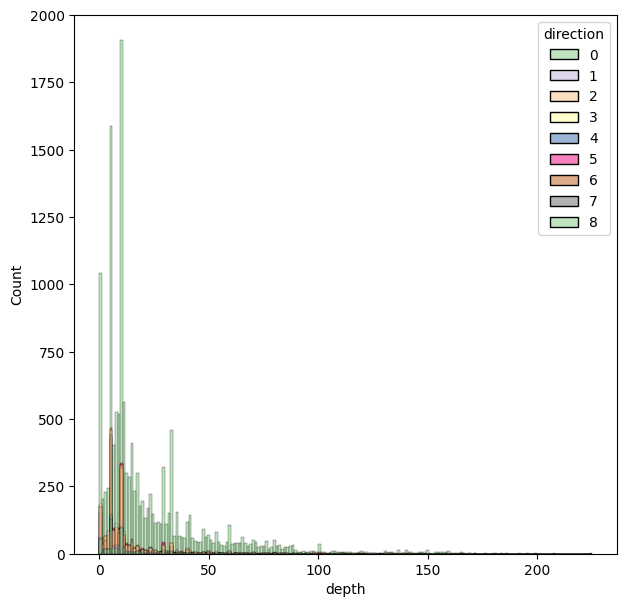

In [ ]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='depth', hue='direction',palette = 'Accent')
plt.show()

<Figure size 700x700 with 0 Axes>

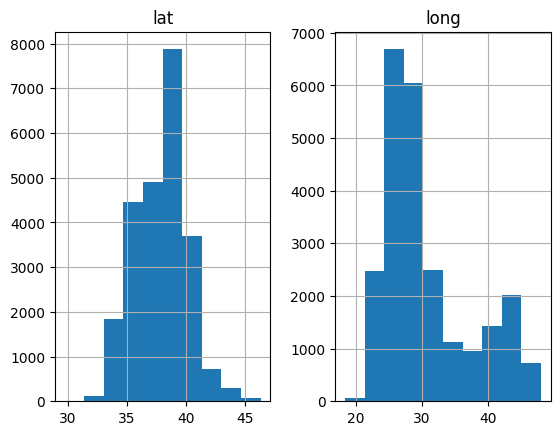

In [ ]:
plt.figure(figsize=(7,7))
df[['lat','long']].hist()
plt.show()

<Axes: ylabel='count'>

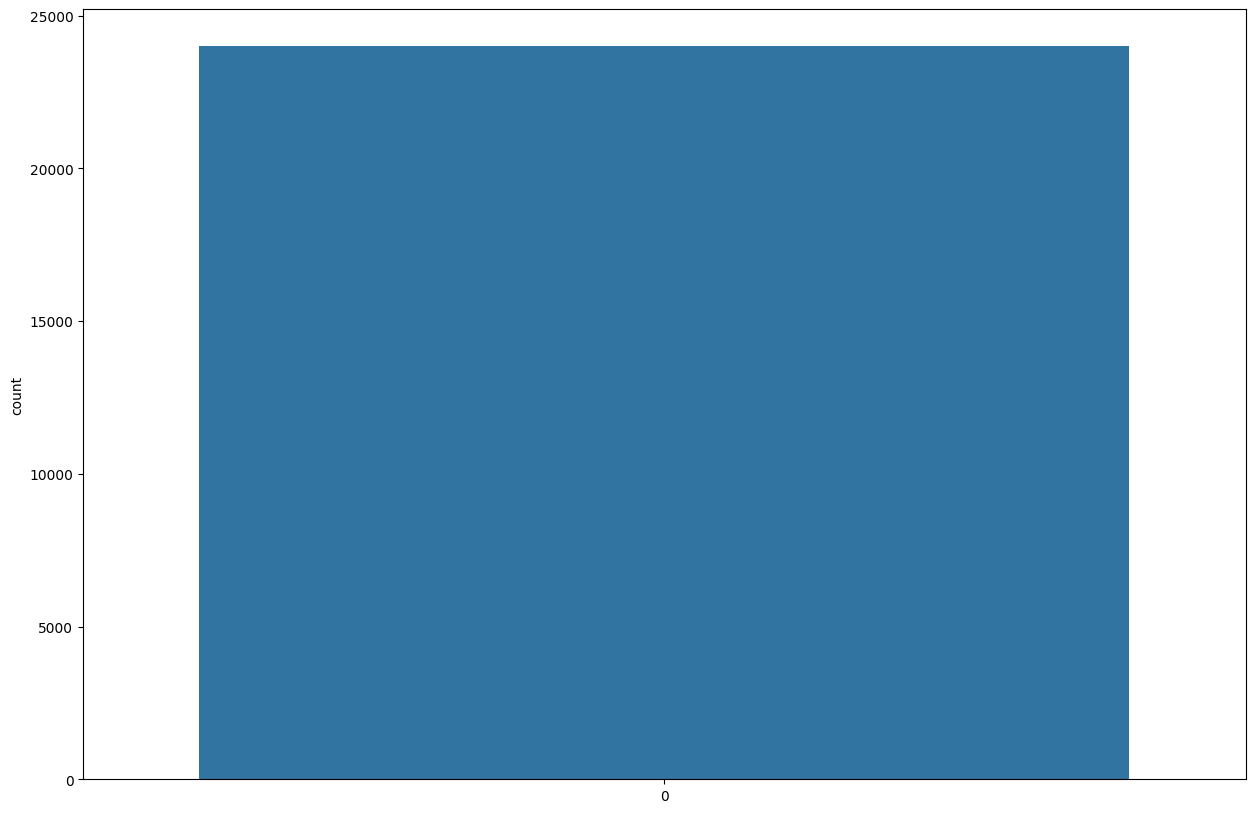

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(df.xm)

<ipython-input-23-2795e4c6156c>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='xm', ylabel='Density'>

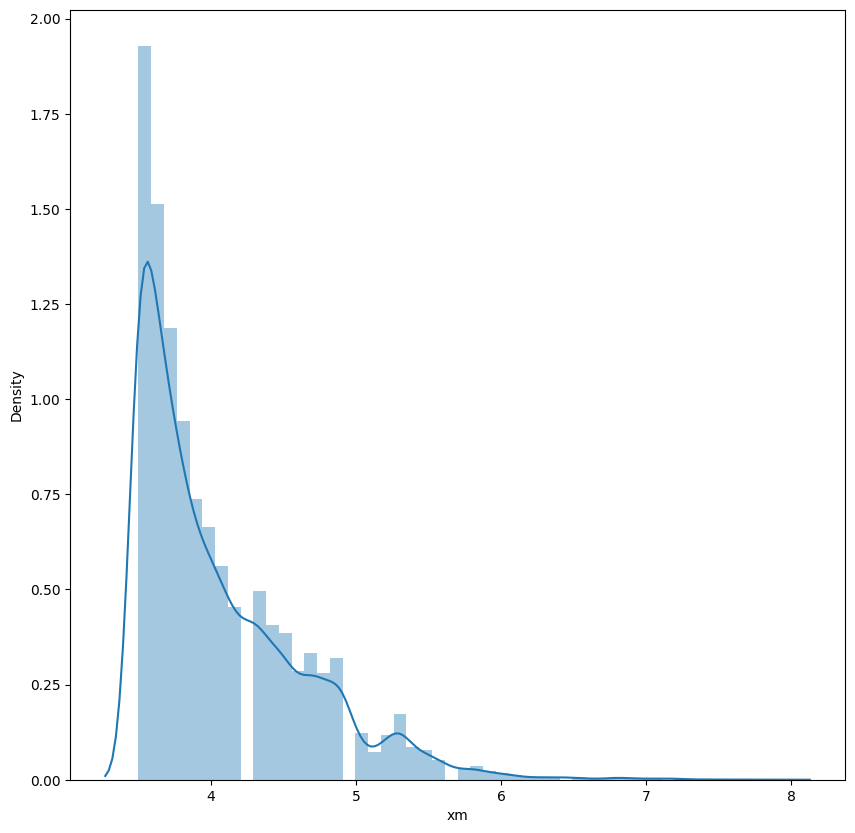

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(df.xm)

Text(0, 0.5, 'ms')

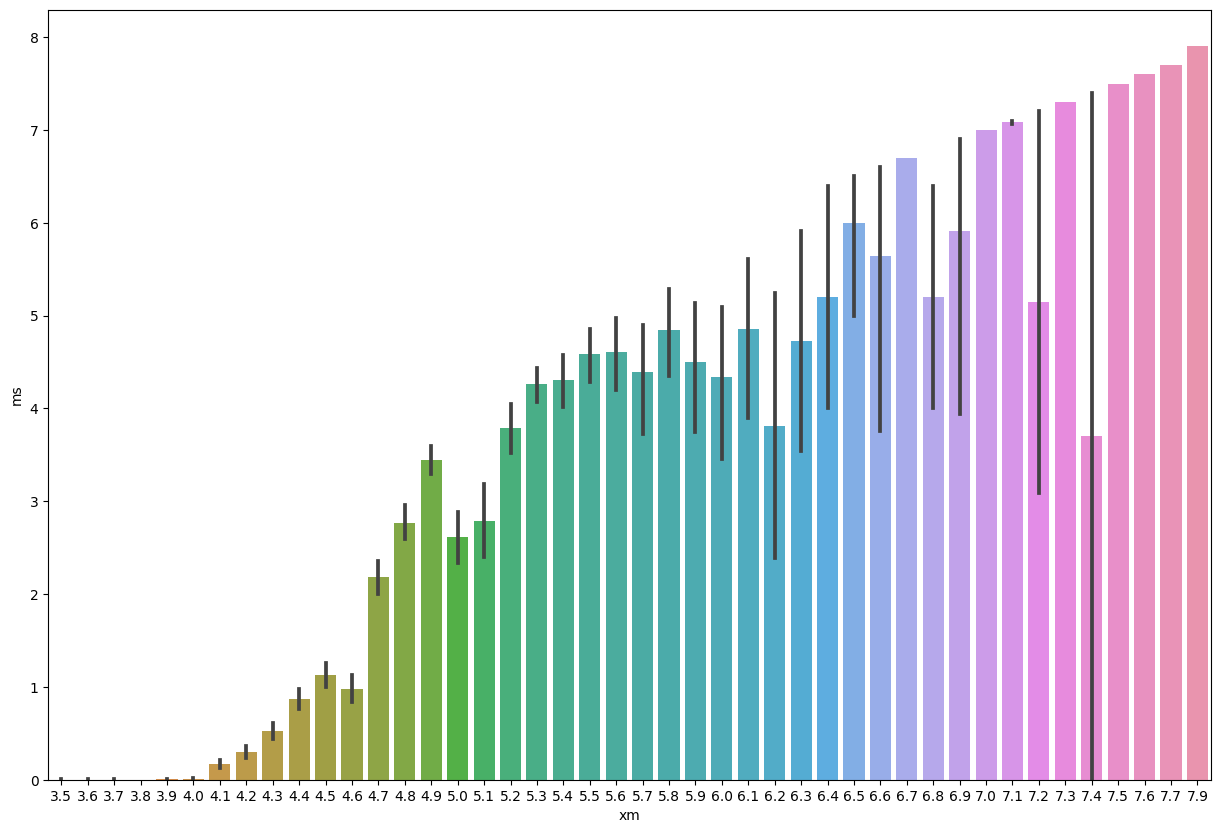

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['xm'], y=df['ms'])
plt.xlabel('xm')
plt.ylabel('ms')

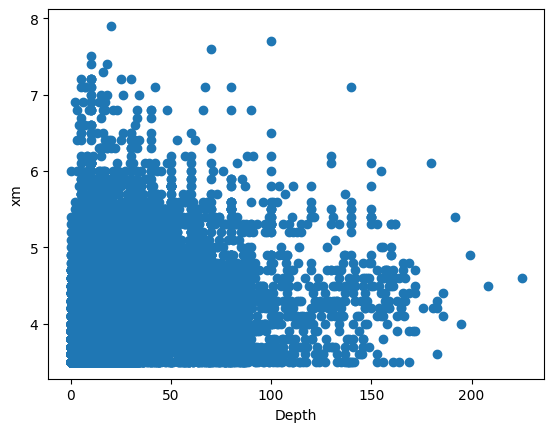

In [ ]:
plt.scatter(df.depth, df.xm)
plt.xlabel("Depth")
plt.ylabel("xm")
plt.show()

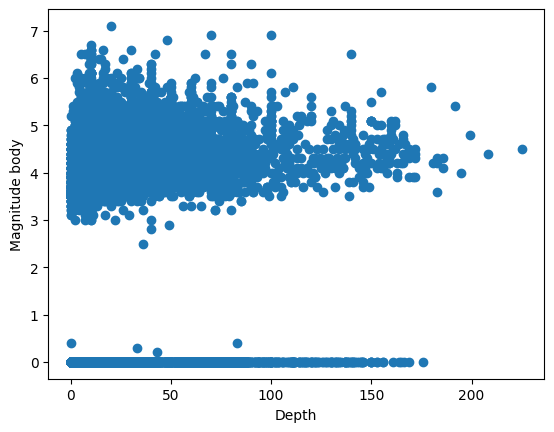

In [ ]:
plt.scatter(df.depth, df.mb)
plt.xlabel("Depth")
plt.ylabel("Magnitude body")
plt.show()

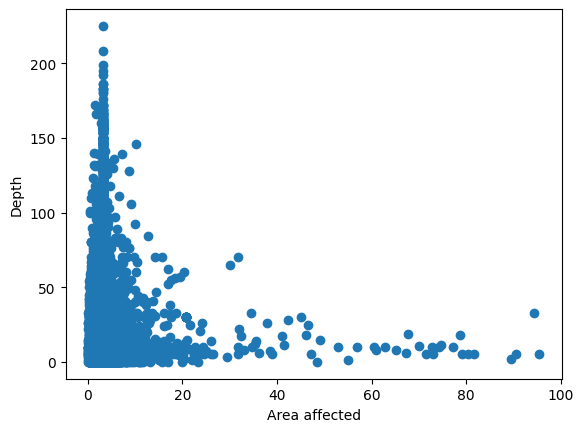

In [ ]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("Depth")
plt.show()

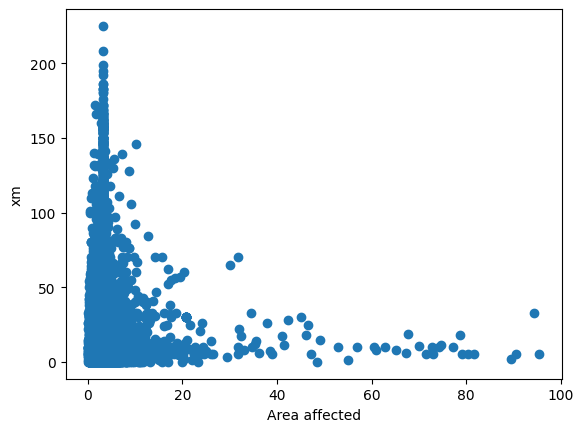

In [ ]:
plt.scatter(df.dist, df.depth)
plt.xlabel("Area affected")
plt.ylabel("xm")
plt.show()

In [ ]:
most_correlated = df.corr()['xm'].sort_values(ascending=False)
most_correlated

xm           1.000000
ms           0.699579
mb           0.628382
richter      0.426653
mw           0.420695
depth        0.302926
md           0.241432
area         0.125275
city         0.107436
direction    0.087696
long         0.071856
dist         0.002853
lat         -0.010347
country     -0.056115
Timestamp   -0.542092
Name: xm, dtype: float64

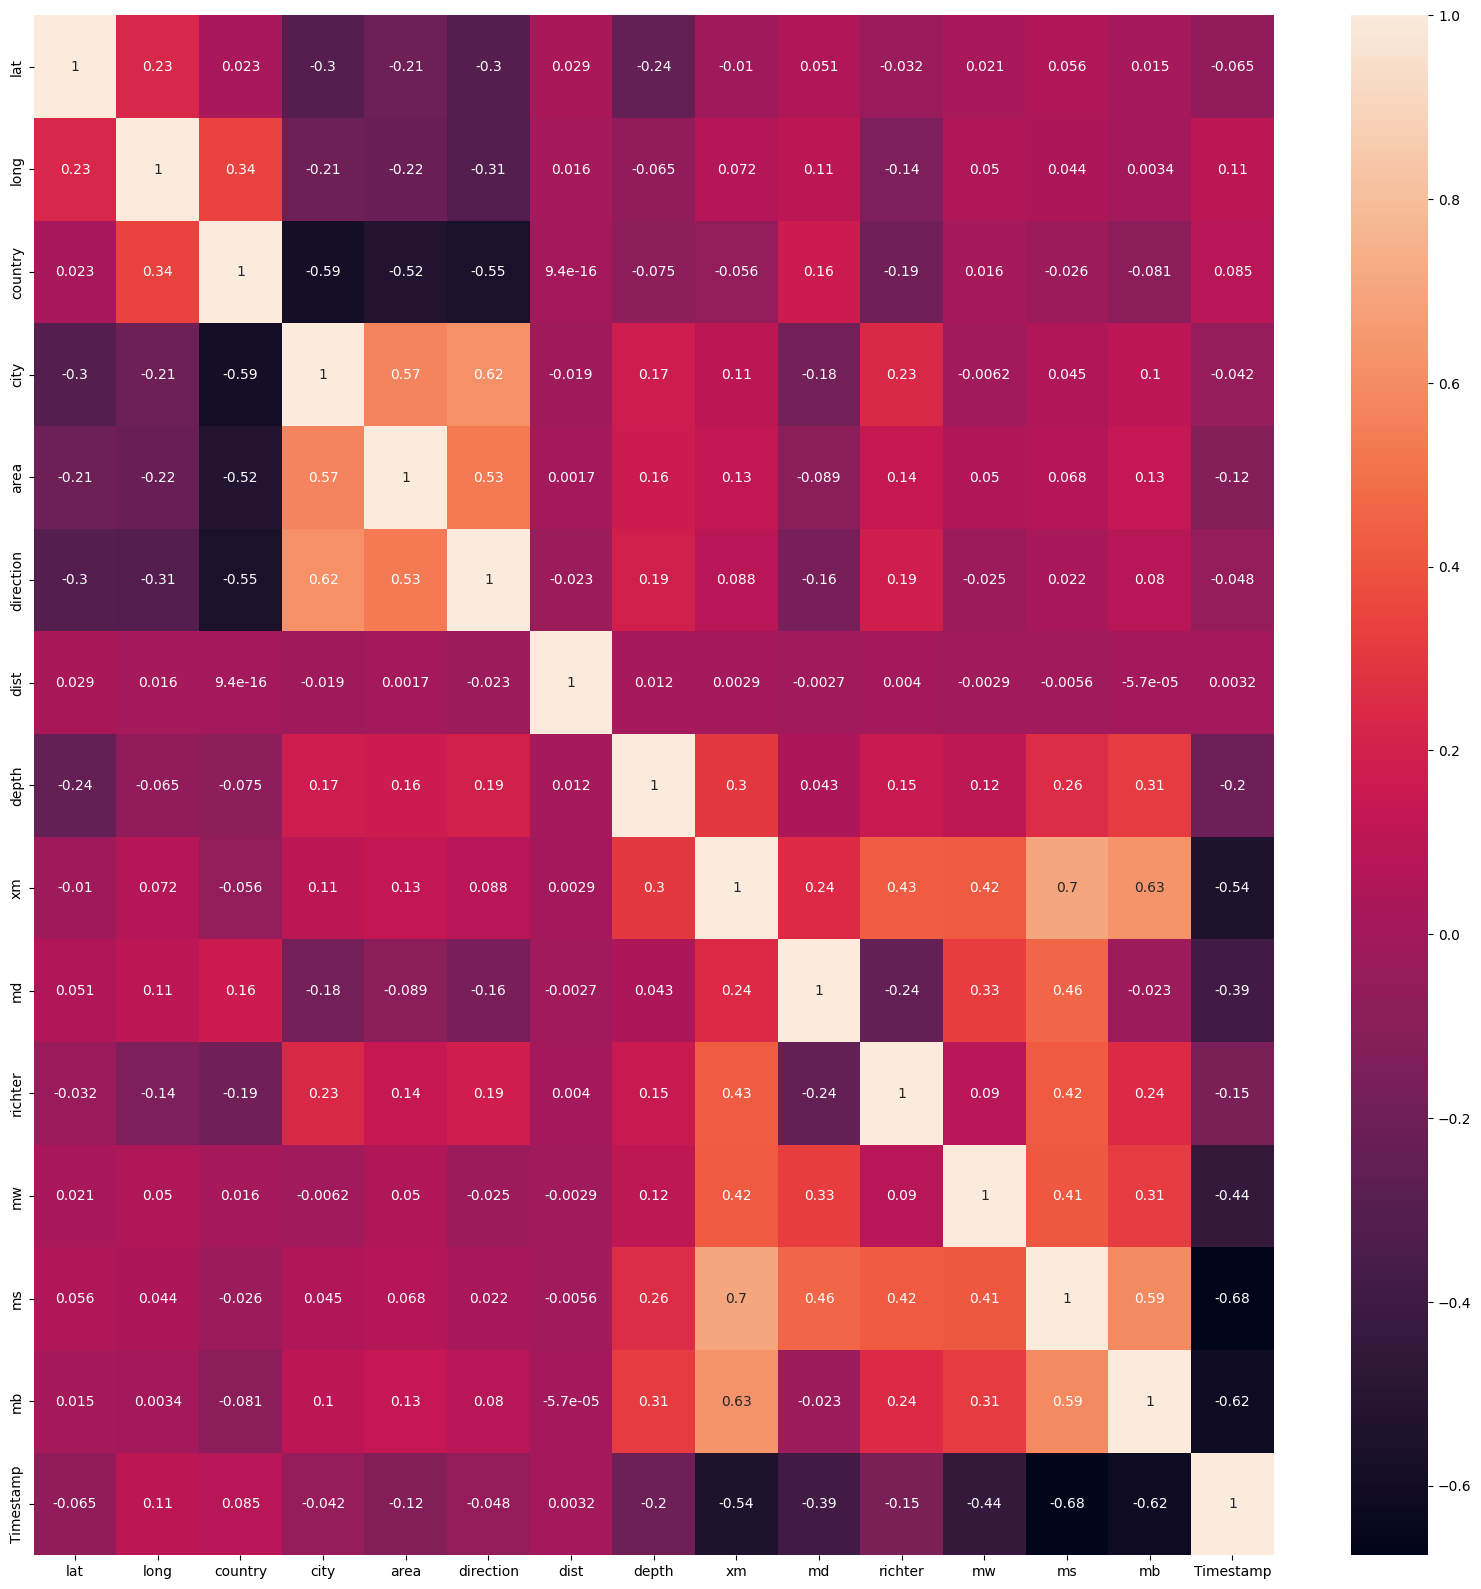

In [ ]:
plt.figure(figsize=(20,20))
dataplot=sns.heatmap(df.corr(),annot=True)
plt.show()

In [36]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.head()

,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,Timestamp
0,0.559904,0.743088,0.76,0.172043,0.116144,0.875,0.0,0.044444,0.136364,0.554054,0.000000,0.581685,0.0,0.000000,0.866875
1,0.665262,0.396156,0.76,0.612903,0.132306,0.875,0.0,0.023111,0.113636,0.513514,0.555556,0.581685,0.0,0.000000,0.906252
2,0.532210,0.312542,0.76,0.677419,0.459500,0.750,0.0,0.000000,0.045455,0.000000,0.000000,0.581685,0.0,0.521127,0.632149
3,0.585792,0.610249,0.76,0.870968,0.513061,0.750,0.0,0.044444,0.000000,0.472973,0.000000,0.581685,0.0,0.000000,0.809118
4,0.665864,0.401214,0.76,0.806452,0.689344,0.750,0.0,0.031111,0.181818,0.581081,0.000000,0.581685,0.0,0.000000,0.837535


In [37]:
y=np.array(df['xm'])
X=np.array(df.drop('xm',axis=1))
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.7,random_state=2)

In [38]:
from sklearn.linear_model import Ridge
start1 = time.time()
rig=Ridge()
rig.fit(X_train,y_train)
ans1 = rig.predict(X_test)
end1 = time.time()
t1 = end1-start1

In [39]:
accuracy1=rig.score(X_test,y_test)
print("Accuracy of  Ridge model is:",accuracy1*100)

Accuracy of  Ridge model is: 62.77408847856633


In [40]:
from sklearn import metrics
print(" Ridge")
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, ans1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ans1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ans1)))

 Ridge
Mean Absolute Error: 0.05914770158921497
Mean Squared Error: 0.006402608059172306
Root Mean Squared Error: 0.08001629870952734


Text(0, 0.5, 'Predicted Magnitude')

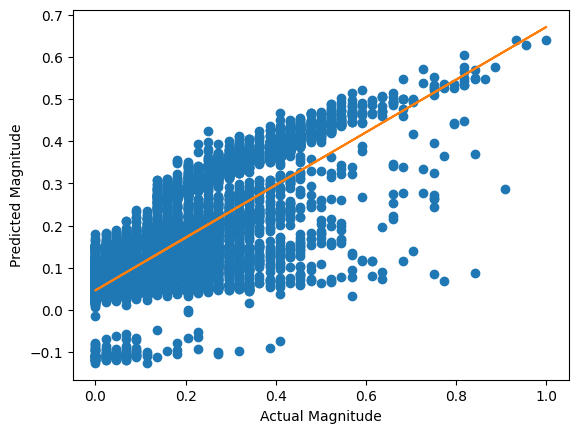

In [41]:
plt.plot(y_test, ans1, 'o')
m, b = np.polyfit(y_test,ans1, 1)
plt.plot(y_test, m*y_test + b)
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")

In [42]:
from sklearn.tree import DecisionTreeRegressor
start2 = time.time()
regressor = DecisionTreeRegressor(random_state = 40)
regressor.fit(X_train,y_train)
ans2 = regressor.predict(X_test)
end2 = time.time()
t2 = end2-start2

<ipython-input-43-b8136196924c>:6: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



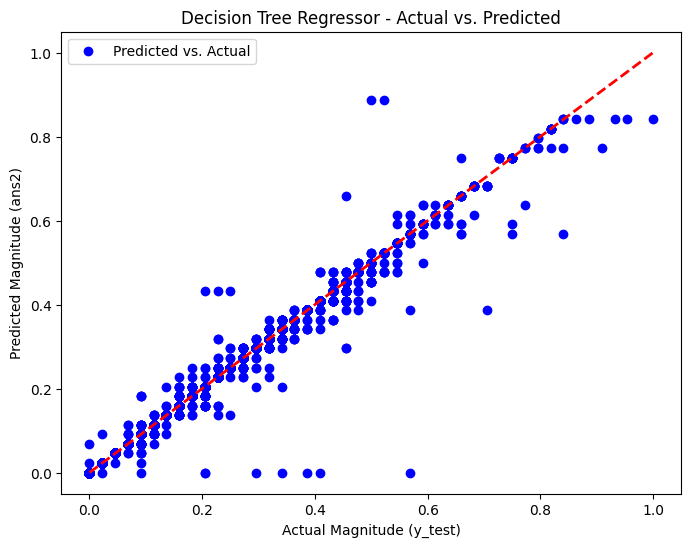

In [43]:
import matplotlib.pyplot as plt

# Plot the actual target values vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, ans2, color='blue', label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red')
plt.xlabel("Actual Magnitude (y_test)")
plt.ylabel("Predicted Magnitude (ans2)")
plt.title("Decision Tree Regressor - Actual vs. Predicted")
plt.legend()
plt.show()


In [45]:
accuracy2=regressor.score(X_test,y_test)
print("Accuracy of Decision Tree model is:",accuracy2*100)

Accuracy of Decision Tree model is: 99.18598401114383


For k = 6 : Accuracy = 0.7889908031677613
For k = 7 : Accuracy = 0.7839443025845729
For k = 10 : Accuracy = 0.7690226861643044
For k = 8 : Accuracy = 0.7792516079528771
For k = 4 : Accuracy = 0.7986960127931608
For k = 5 : Accuracy = 0.7939315396816573
For k = 3 : Accuracy = 0.8011112421148958


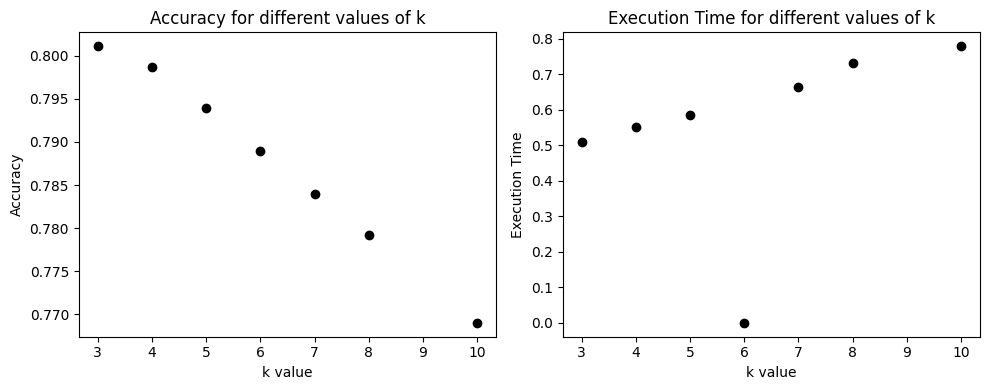

In [47]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import random
import time

info = {}

# Create a KNN Regressor with n_neighbors=6
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(X_train, y_train)
ans3 = knn.predict(X_test)

# Calculate accuracy for k=6 and store it in accuracy3
accuracy3 = knn.score(X_test, y_test)

# Store the accuracy and execution time for k=6
start_time = time.time()
end_time = time.time()
t3 = end_time - start_time
info[6] = [accuracy3, t3]

# Generate and evaluate KNN models with random k values
for i in range(10):
    k = random.randint(2, 10)
    startk = time.time()
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    ans3 = knn.predict(X_test)
    endk = time.time()
    tk = endk - startk
    acc3 = knn.score(X_test, y_test)
    info[k] = [acc3, tk]

# Print accuracy for different k values
for k, acc_time in info.items():
    print("For k =", k, ": Accuracy =", acc_time[0])

# Plot accuracy and execution time
x = list(info.keys())
yacc = [info[k][0] for k in x]
yt = [info[k][1] for k in x]

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(x, yacc, 'o', color='black')
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different values of k")

# Plot execution time
plt.subplot(1, 2, 2)
plt.plot(x, yt, 'o', color='black')
plt.xlabel("k value")
plt.ylabel("Execution Time")
plt.title("Execution Time for different values of k")

plt.tight_layout()
plt.show()


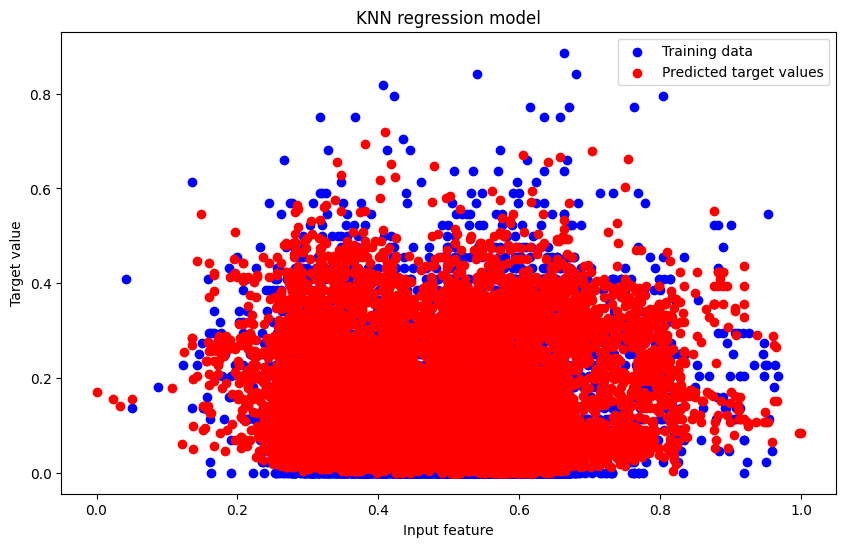

In [49]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Create a KNN Regressor with n_neighbors=6
knn = KNeighborsRegressor(n_neighbors=6)

# Train the model on the training data
knn.fit(X_train, y_train)

# Predict the target values for the test data
ans3 = knn.predict(X_test)

# Plot the training data and the predicted target values for the test data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot the training data
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')

# Plot the predicted target values for the test data
plt.scatter(X_test[:, 0], ans3, color='red', label='Predicted target values')

# Add labels and title
plt.xlabel('Input feature')
plt.ylabel('Target value')
plt.title('KNN regression model')
plt.legend()

plt.show()


In [50]:
accuracy3 = knn.score(X_test, y_test)
print("Accuracy for k=6:", accuracy3*100)


Accuracy for k=6: 78.89908031677612


In [54]:
models = ["RIDGE","DECISION","KNN"]
accuracies = [accuracy1,accuracy2,accuracy3]

Text(0.5, 1.0, 'Accuracy Comparison Graph')

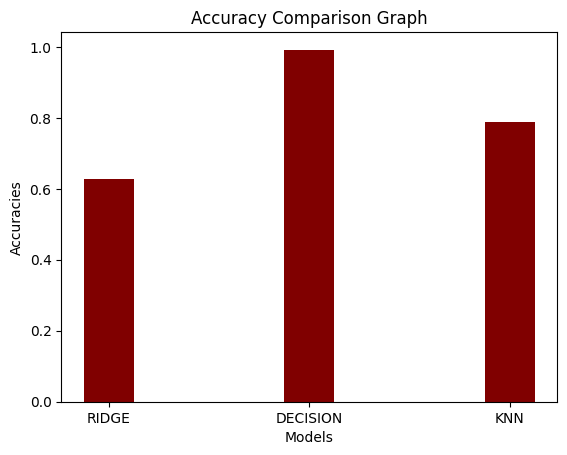

In [55]:
plt.bar(models, accuracies, color ='maroon',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Accuracies")
plt.title("Accuracy Comparison Graph")

Text(0.5, 1.0, 'Execution Time Comparison Graph')

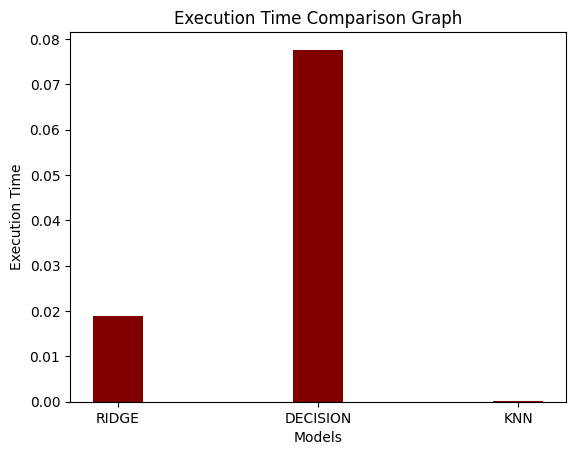

In [56]:
times = [t1,t2,t3]
plt.bar(models, times, color ='maroon',
        width = 0.25)
plt.xlabel("Models")
plt.ylabel("Execution Time")
plt.title("Execution Time Comparison Graph")